In [1]:
!pip install scikit-learn

In [457]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier

In [458]:
# 데이터셋 데이터프레임으로 읽어오기
df = pd.read_csv("penguins_lter.csv")
df

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
0,PAL0708,1,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,11/11/07,39.1,18.7,181.0,3750.0,MALE,NaN,NaN,Not enough blood for isotopes.
1,PAL0708,2,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,11/11/07,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454,NaN
2,PAL0708,3,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,11/16/07,40.3,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302,NaN
3,PAL0708,4,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A2,Yes,11/16/07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adult not sampled.
4,PAL0708,5,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N3A1,Yes,11/16/07,36.7,19.3,193.0,3450.0,FEMALE,8.76651,-25.32426,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
339,PAL0910,120,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N38A2,No,12/1/09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
340,PAL0910,121,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N39A1,Yes,11/22/09,46.8,14.3,215.0,4850.0,FEMALE,8.41151,-26.13832,NaN
341,PAL0910,122,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N39A2,Yes,11/22/09,50.4,15.7,222.0,5750.0,MALE,8.30166,-26.04117,NaN
342,PAL0910,123,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N43A1,Yes,11/22/09,45.2,14.8,212.0,5200.0,FEMALE,8.24246,-26.11969,NaN


In [459]:
# 데이터프레임 정보확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   studyName            344 non-null    object 
 1   Sample Number        344 non-null    int64  
 2   Species              344 non-null    object 
 3   Region               344 non-null    object 
 4   Island               344 non-null    object 
 5   Stage                344 non-null    object 
 6   Individual ID        344 non-null    object 
 7   Clutch Completion    344 non-null    object 
 8   Date Egg             344 non-null    object 
 9   Culmen Length (mm)   342 non-null    float64
 10  Culmen Depth (mm)    342 non-null    float64
 11  Flipper Length (mm)  342 non-null    float64
 12  Body Mass (g)        342 non-null    float64
 13  Sex                  334 non-null    object 
 14  Delta 15 N (o/oo)    330 non-null    float64
 15  Delta 13 C (o/oo)    331 non-null    flo

In [460]:
# 데이터프레임 통계정보
df.describe()

,Sample Number,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Delta 15 N (o/oo),Delta 13 C (o/oo)
count,344.000000,342.000000,342.000000,342.000000,342.000000,330.000000,331.000000
mean,63.151163,43.921930,17.151170,200.915205,4201.754386,8.733382,-25.686292
std,40.430199,5.459584,1.974793,14.061714,801.954536,0.551770,0.793961
min,1.000000,32.100000,13.100000,172.000000,2700.000000,7.632200,-27.018540
25%,29.000000,39.225000,15.600000,190.000000,3550.000000,8.299890,-26.320305
50%,58.000000,44.450000,17.300000,197.000000,4050.000000,8.652405,-25.833520
75%,95.250000,48.500000,18.700000,213.000000,4750.000000,9.172123,-25.062050
max,152.000000,59.600000,21.500000,231.000000,6300.000000,10.025440,-23.787670


In [461]:
# 결측값(NaN값) 확인
df.isna().sum()

studyName                0
Sample Number            0
Species                  0
Region                   0
Island                   0
Stage                    0
Individual ID            0
Clutch Completion        0
Date Egg                 0
Culmen Length (mm)       2
Culmen Depth (mm)        2
Flipper Length (mm)      2
Body Mass (g)            2
Sex                     10
Delta 15 N (o/oo)       14
Delta 13 C (o/oo)       13
Comments               318
dtype: int64

In [462]:
df["studyName"].value_counts()

studyName
PAL0910    120
PAL0809    114
PAL0708    110
Name: count, dtype: int64

In [463]:
df["Region"].value_counts()

Region
Anvers    344
Name: count, dtype: int64

In [464]:
df["Island"].value_counts()

Island
Biscoe       168
Dream        124
Torgersen     52
Name: count, dtype: int64

In [465]:
df["Stage"].value_counts()

Stage
Adult, 1 Egg Stage    344
Name: count, dtype: int64

In [466]:
df["Individual ID"].value_counts()

Individual ID
N61A2    3
N29A2    3
N22A1    3
N22A2    3
N23A1    3
        ..
N10A1    1
N10A2    1
N84A2    1
N84A1    1
N43A2    1
Name: count, Length: 190, dtype: int64

In [467]:
df["Date Egg"].value_counts()

Date Egg
11/27/07    18
11/9/08     16
11/16/07    16
11/18/09    14
11/4/08     12
11/6/08     12
11/13/08    12
11/21/09    12
11/29/07    10
11/27/09    10
11/15/09    10
11/14/08    10
11/16/09    10
11/22/09    10
11/17/09    10
11/24/08     8
11/28/07     8
11/3/08      8
12/1/09      8
11/9/07      8
11/8/08      8
11/12/07     8
11/13/07     6
11/25/09     6
11/20/09     6
11/2/08      6
12/3/07      6
11/23/09     6
11/9/09      4
11/19/07     4
11/25/08     4
11/30/07     4
11/15/08     4
11/21/07     4
11/26/07     4
11/13/09     4
11/10/07     4
11/11/08     4
11/17/08     4
11/15/07     4
11/10/09     4
11/18/07     2
11/10/08     2
11/19/09     2
11/22/07     2
11/14/09     2
11/7/08      2
11/12/09     2
11/5/08      2
11/11/07     2
Name: count, dtype: int64

In [468]:
df["Sex"].value_counts()

Sex
MALE      168
FEMALE    165
.           1
Name: count, dtype: int64

In [469]:
# 사용하지 않을 column 제외
df.drop(["studyName", "Sample Number", "Clutch Completion", "Region", "Stage", "Individual ID", "Date Egg", "Delta 15 N (o/oo)", "Delta 13 C (o/oo)", "Comments"], axis=1, inplace=True)
df

,Species,Island,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex
0,Adelie Penguin (Pygoscelis adeliae),Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie Penguin (Pygoscelis adeliae),Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie Penguin (Pygoscelis adeliae),Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie Penguin (Pygoscelis adeliae),Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie Penguin (Pygoscelis adeliae),Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo penguin (Pygoscelis papua),Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo penguin (Pygoscelis papua),Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo penguin (Pygoscelis papua),Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo penguin (Pygoscelis papua),Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [470]:
# 정리한 데이터프레임 결측값(NaN값) 확인
df.isna().sum()

Species                 0
Island                  0
Culmen Length (mm)      2
Culmen Depth (mm)       2
Flipper Length (mm)     2
Body Mass (g)           2
Sex                    10
dtype: int64

In [471]:
# 결측값(NaN값) 제거
df.dropna(inplace=True)
df

,Species,Island,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex
0,Adelie Penguin (Pygoscelis adeliae),Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie Penguin (Pygoscelis adeliae),Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie Penguin (Pygoscelis adeliae),Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie Penguin (Pygoscelis adeliae),Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie Penguin (Pygoscelis adeliae),Torgersen,39.3,20.6,190.0,3650.0,MALE
...,...,...,...,...,...,...,...
338,Gentoo penguin (Pygoscelis papua),Biscoe,47.2,13.7,214.0,4925.0,FEMALE
340,Gentoo penguin (Pygoscelis papua),Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo penguin (Pygoscelis papua),Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo penguin (Pygoscelis papua),Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [472]:
# 결측값(NaN값) 제거 후 확인
df.isna().sum()

Species                0
Island                 0
Culmen Length (mm)     0
Culmen Depth (mm)      0
Flipper Length (mm)    0
Body Mass (g)          0
Sex                    0
dtype: int64

In [473]:
# '.'을 포함한 index를 제외
df.drop(df[df["Sex"] == '.'].index, inplace=True)

In [474]:
df.drop(["index"], axis=1, inplace=True)
df.reset_index()
df.tail(10)

KeyError: "['index'] not found in axis"

In [475]:
df["Species"].value_counts()

Species
Adelie Penguin (Pygoscelis adeliae)          146
Gentoo penguin (Pygoscelis papua)            119
Chinstrap penguin (Pygoscelis antarctica)     68
Name: count, dtype: int64

In [476]:
# 펭귄 종 이름 보기 쉽게 변경
df["Species"] = df["Species"].apply(lambda x: "Adelie Penguin" if x == "Adelie Penguin (Pygoscelis adeliae)" 
                                    else "Gentoo penguin" if x == "Gentoo penguin (Pygoscelis papua)"
                                    else "Chinstrap penguin" if x == "Chinstrap penguin (Pygoscelis antarctica)"
                                    else x)
df

,Species,Island,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex
0,Adelie Penguin,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie Penguin,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie Penguin,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie Penguin,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie Penguin,Torgersen,39.3,20.6,190.0,3650.0,MALE
...,...,...,...,...,...,...,...
338,Gentoo penguin,Biscoe,47.2,13.7,214.0,4925.0,FEMALE
340,Gentoo penguin,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo penguin,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo penguin,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [477]:
# 라벨인코딩
df["Island"] = LabelEncoder().fit_transform(df["Island"])
df

,Species,Island,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex
0,Adelie Penguin,2,39.1,18.7,181.0,3750.0,MALE
1,Adelie Penguin,2,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie Penguin,2,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie Penguin,2,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie Penguin,2,39.3,20.6,190.0,3650.0,MALE
...,...,...,...,...,...,...,...
338,Gentoo penguin,0,47.2,13.7,214.0,4925.0,FEMALE
340,Gentoo penguin,0,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo penguin,0,50.4,15.7,222.0,5750.0,MALE
342,Gentoo penguin,0,45.2,14.8,212.0,5200.0,FEMALE


In [478]:
# 라벨인코딩
df["Sex"] = LabelEncoder().fit_transform(df["Sex"])
df

,Species,Island,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex
0,Adelie Penguin,2,39.1,18.7,181.0,3750.0,1
1,Adelie Penguin,2,39.5,17.4,186.0,3800.0,0
2,Adelie Penguin,2,40.3,18.0,195.0,3250.0,0
4,Adelie Penguin,2,36.7,19.3,193.0,3450.0,0
5,Adelie Penguin,2,39.3,20.6,190.0,3650.0,1
...,...,...,...,...,...,...,...
338,Gentoo penguin,0,47.2,13.7,214.0,4925.0,0
340,Gentoo penguin,0,46.8,14.3,215.0,4850.0,0
341,Gentoo penguin,0,50.4,15.7,222.0,5750.0,1
342,Gentoo penguin,0,45.2,14.8,212.0,5200.0,0


In [479]:
df_1 = df.copy()
df_1["Species"] = LabelEncoder().fit_transform(df_1["Species"])
df_1

,Species,Island,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex
0,0,2,39.1,18.7,181.0,3750.0,1
1,0,2,39.5,17.4,186.0,3800.0,0
2,0,2,40.3,18.0,195.0,3250.0,0
4,0,2,36.7,19.3,193.0,3450.0,0
5,0,2,39.3,20.6,190.0,3650.0,1
...,...,...,...,...,...,...,...
338,2,0,47.2,13.7,214.0,4925.0,0
340,2,0,46.8,14.3,215.0,4850.0,0
341,2,0,50.4,15.7,222.0,5750.0,1
342,2,0,45.2,14.8,212.0,5200.0,0


<Axes: >

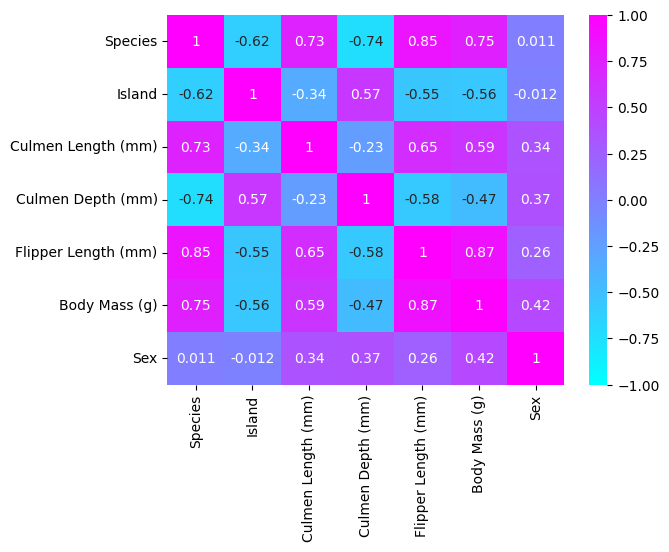

In [480]:
# columns의 관계성 확인하기
sns.heatmap(df_1.corr(numeric_only=True), vmax=1, vmin=-1, cmap="cool", annot=True)

In [481]:
df

,Species,Island,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex
0,Adelie Penguin,2,39.1,18.7,181.0,3750.0,1
1,Adelie Penguin,2,39.5,17.4,186.0,3800.0,0
2,Adelie Penguin,2,40.3,18.0,195.0,3250.0,0
4,Adelie Penguin,2,36.7,19.3,193.0,3450.0,0
5,Adelie Penguin,2,39.3,20.6,190.0,3650.0,1
...,...,...,...,...,...,...,...
338,Gentoo penguin,0,47.2,13.7,214.0,4925.0,0
340,Gentoo penguin,0,46.8,14.3,215.0,4850.0,0
341,Gentoo penguin,0,50.4,15.7,222.0,5750.0,1
342,Gentoo penguin,0,45.2,14.8,212.0,5200.0,0


In [482]:
df["Sex"].value_counts()

Sex
1    168
0    165
Name: count, dtype: int64

In [483]:
df.isna().sum()

Species                0
Island                 0
Culmen Length (mm)     0
Culmen Depth (mm)      0
Flipper Length (mm)    0
Body Mass (g)          0
Sex                    0
dtype: int64

In [484]:
# 원 핫 인코딩
df = pd.get_dummies(df, columns=["Island", "Sex"])
df.head()

,Species,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Island_0,Island_1,Island_2,Sex_0,Sex_1
0,Adelie Penguin,39.1,18.7,181.0,3750.0,False,False,True,False,True
1,Adelie Penguin,39.5,17.4,186.0,3800.0,False,False,True,True,False
2,Adelie Penguin,40.3,18.0,195.0,3250.0,False,False,True,True,False
4,Adelie Penguin,36.7,19.3,193.0,3450.0,False,False,True,True,False
5,Adelie Penguin,39.3,20.6,190.0,3650.0,False,False,True,False,True


In [485]:
# 라벨인코딩
y = LabelEncoder().fit_transform(df["Species"])
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [486]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(["Species"], axis=1), y, test_size=0.2, random_state=2024)

In [487]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((266, 9), (266,), (67, 9), (67,))

In [488]:
# estimator: 학습에 사용하는 알고리즘, Defualt=None => DecisionTreeClassifier(max_depth="1")가 적용
# n_estimators: 생성할 약한 학습기의 개수를 지정
# learing_rate: 학습을 진행할 때마다 적용하는 학습률(0~1), Default = 1.0
# 약한 학습기가 순차적으로 오류 값을 보정해나갈 때 적용하는 계수
ad = AdaBoostClassifier(algorithm="SAMME", n_estimators=30, learning_rate=0.5, random_state=2024)

# 훈련
ad.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME', learning_rate=0.5, n_estimators=30,
                   random_state=2024)

In [489]:
# 예측
# 모델의 최종 예측값 출력
pred = ad.predict(X_test)
pred

array([2, 2, 0, 1, 0, 0, 0, 0, 0, 1, 0, 2, 2, 0, 2, 1, 2, 0, 0, 2, 0, 2,
       2, 2, 1, 1, 0, 0, 2, 0, 2, 2, 1, 2, 1, 0, 1, 0, 0, 2, 0, 1, 1, 0,
       0, 0, 2, 2, 0, 1, 0, 1, 0, 0, 2, 1, 2, 2, 2, 1, 2, 2, 1, 2, 0, 1,
       1])

In [490]:
# 예측
# 모덱의 각 클랙스에 대한 확률 출력
proba = ad.predict_proba(X_test)
proba

array([[0.27453703, 0.29727116, 0.42819182],
       [0.28248626, 0.29834879, 0.41916495],
       [0.39147707, 0.2847005 , 0.32382243],
       [0.33879959, 0.39898813, 0.26221227],
       [0.43424962, 0.28507756, 0.28067282],
       [0.40421687, 0.3407209 , 0.25506224],
       [0.38772204, 0.34292039, 0.26935757],
       [0.38628561, 0.35809536, 0.25561903],
       [0.41763943, 0.26169235, 0.32066822],
       [0.33879959, 0.39898813, 0.26221227],
       [0.41763943, 0.26169235, 0.32066822],
       [0.28971768, 0.29092877, 0.41935356],
       [0.27453703, 0.29727116, 0.42819182],
       [0.42504914, 0.28611396, 0.2888369 ],
       [0.28248626, 0.29834879, 0.41916495],
       [0.33879959, 0.39898813, 0.26221227],
       [0.27453703, 0.29727116, 0.42819182],
       [0.41763943, 0.26169235, 0.32066822],
       [0.40421687, 0.3407209 , 0.25506224],
       [0.27453703, 0.29727116, 0.42819182],
       [0.38208943, 0.28513008, 0.33278048],
       [0.31594319, 0.30179733, 0.38225949],
       [0.

In [491]:
accuracy_score(y_test, pred)

0.9850746268656716

In [492]:
confusion_matrix(y_test, pred)

array([[25,  0,  0],
       [ 1, 17,  0],
       [ 0,  0, 24]], dtype=int64)

In [493]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        25
           1       1.00      0.94      0.97        18
           2       1.00      1.00      1.00        24

    accuracy                           0.99        67
   macro avg       0.99      0.98      0.98        67
weighted avg       0.99      0.99      0.99        67



In [494]:
# ValueError: multi_class must be in ('ovo', 'ovr')
# ovo: One-vs-One(일대일) 가능한 모든 클래스 쌍 조합의 평균 auc를 계산
# ovr: One-vs-rest(일대나머지) 나머지에 대한 각 클래스 auc를 계산
roc_auc_score(y_test, proba, multi_class="ovo")

1.0

In [495]:
roc_auc_score(y_test, proba, multi_class="ovr")

1.0

In [496]:
# 하이퍼 파라미터 수정
ad1 = AdaBoostClassifier(n_estimators=20, learning_rate=0.1, random_state=2024, algorithm="SAMME")
ad1.fit(X_train, y_train)
proba1 = ad1.predict_proba(X_test)
roc_auc_score(y_test, proba1, multi_class='ovr')

0.9956956529381779

In [501]:
# 최적값 찾기
params = {
    "estimator": [DecisionTreeClassifier(max_depth=2), DecisionTreeClassifier(max_depth=10), DecisionTreeClassifier(max_depth=30)],
    "learning_rate": [1, 4, 6, 8, 10],
    "n_estimators": [140, 60, 20, 30, 80]
}

In [502]:
# GridSearchCV
ad2 = AdaBoostClassifier(random_state=2024, algorithm="SAMME")
grid_df = GridSearchCV(ad2, params)
grid_df.fit(X_train, y_train)

GridSearchCV(estimator=AdaBoostClassifier(algorithm='SAMME', random_state=2024),
             param_grid={'estimator': [DecisionTreeClassifier(max_depth=2),
                                       DecisionTreeClassifier(max_depth=10),
                                       DecisionTreeClassifier(max_depth=30)],
                         'learning_rate': [1, 4, 6, 8, 10],
                         'n_estimators': [140, 60, 20, 30, 80]})

In [503]:
grid_df.best_params_

{'estimator': DecisionTreeClassifier(max_depth=2),
 'learning_rate': 1,
 'n_estimators': 60}

In [504]:
grid_df.best_score_

0.9850454227812719

In [505]:
grid_df.cv_results_

{'mean_fit_time': array([0.22956405, 0.0936327 , 0.03044004, 0.04465418, 0.11365356,
        0.20512791, 0.08501797, 0.029074  , 0.0428196 , 0.11004839,
        0.2045517 , 0.08680053, 0.03708858, 0.04685569, 0.12165604,
        0.21976776, 0.09673896, 0.03337374, 0.05263591, 0.11784806,
        0.21195211, 0.09228325, 0.03397164, 0.04887772, 0.17956715,
        0.00507231, 0.00537624, 0.00600963, 0.004355  , 0.00404758,
        0.00517049, 0.00408316, 0.00574918, 0.004811  , 0.00415411,
        0.00389915, 0.00371609, 0.00457888, 0.00430589, 0.00499535,
        0.00420942, 0.00384612, 0.00420914, 0.00449052, 0.00374851,
        0.00366392, 0.00383563, 0.00383697, 0.00423465, 0.00443859,
        0.00402932, 0.00395389, 0.00380793, 0.00370593, 0.00433536,
        0.00401034, 0.00417609, 0.00387292, 0.0046617 , 0.00375848,
        0.00423708, 0.00367622, 0.00340033, 0.00388517, 0.00371227,
        0.00344367, 0.00341253, 0.00310802, 0.00346394, 0.00327449,
        0.00331049, 0.00330482,

In [506]:
# RandomizedSearchCV
ad3 = AdaBoostClassifier(random_state=2024, algorithm="SAMME")
rand_df = RandomizedSearchCV(ad3, params, n_iter=5, random_state=2024)
rand_df.fit(X_train, y_train)

RandomizedSearchCV(estimator=AdaBoostClassifier(algorithm='SAMME',
                                                random_state=2024),
                   n_iter=5,
                   param_distributions={'estimator': [DecisionTreeClassifier(max_depth=2),
                                                      DecisionTreeClassifier(max_depth=10),
                                                      DecisionTreeClassifier(max_depth=30)],
                                        'learning_rate': [1, 4, 6, 8, 10],
                                        'n_estimators': [140, 60, 20, 30, 80]},
                   random_state=2024)

In [507]:
rand_df.best_params_

{'n_estimators': 30,
 'learning_rate': 1,
 'estimator': DecisionTreeClassifier(max_depth=2)}

In [508]:
rand_df.best_score_

0.9850454227812719

In [509]:
rand_df.cv_results_

{'mean_fit_time': array([0.06484771, 0.06735563, 0.00391645, 0.0030983 , 0.00361862]),
 'std_fit_time': array([6.22048507e-03, 4.24355725e-02, 1.08771312e-03, 9.01309771e-05,
        5.17052554e-04]),
 'mean_score_time': array([0.00697179, 0.0059916 , 0.00163655, 0.00198793, 0.00162568]),
 'std_score_time': array([1.61825134e-03, 1.77626115e-03, 5.12423427e-04, 1.48563665e-05,
        4.41797967e-04]),
 'param_n_estimators': masked_array(data=[30, 20, 20, 30, 80],
              mask=[False, False, False, False, False],
        fill_value=999999),
 'param_learning_rate': masked_array(data=[1, 1, 8, 8, 1],
              mask=[False, False, False, False, False],
        fill_value=999999),
 'param_estimator': masked_array(data=[DecisionTreeClassifier(max_depth=2),
                    DecisionTreeClassifier(max_depth=2),
                    DecisionTreeClassifier(max_depth=30),
                    DecisionTreeClassifier(max_depth=30),
                    DecisionTreeClassifier(max_depth=30

In [510]:
# Feature Inportances
ad4 = AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=2), algorithm="SAMME", learning_rate=1, n_estimators=30, random_state=2024)
ad4.fit(X_train, y_train)
proba4 = ad4.predict_proba(X_test)
roc_auc_score(y_test, proba4, multi_class="ovo")

1.0

In [511]:
roc_auc_score(y_test, proba4, multi_class="ovr")

1.0

In [512]:
ad4.feature_importances_

array([0.2994957 , 0.13325825, 0.15216611, 0.08072209, 0.17496793,
       0.09588121, 0.02034692, 0.01828172, 0.02488006])

In [513]:
feature_imp = pd.DataFrame({
    "feature": X_train.columns,
    "importances": ad4.feature_importances_
})

feature_imp

,feature,importances
0,Culmen Length (mm),0.299496
1,Culmen Depth (mm),0.133258
2,Flipper Length (mm),0.152166
3,Body Mass (g),0.080722
4,Island_0,0.174968
5,Island_1,0.095881
6,Island_2,0.020347
7,Sex_0,0.018282
8,Sex_1,0.024880


In [514]:
sort = feature_imp.sort_values("importances", ascending=False).head()

C:\Users\dnjsw\AppData\Local\Temp\ipykernel_22100\3568174083.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="feature", y="importances", data=sort, palette="Set1")


<Axes: xlabel='feature', ylabel='importances'>

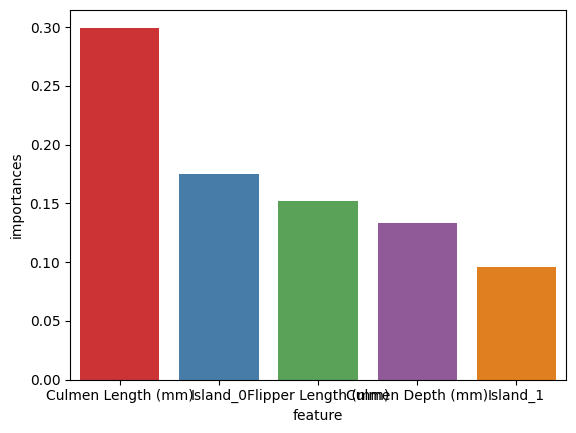

In [515]:
sns.barplot(x="feature", y="importances", data=sort, palette="Set1")